## Importing the Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sn

np.random.seed(2)

C:\Users\HP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

## Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Display the Histograms

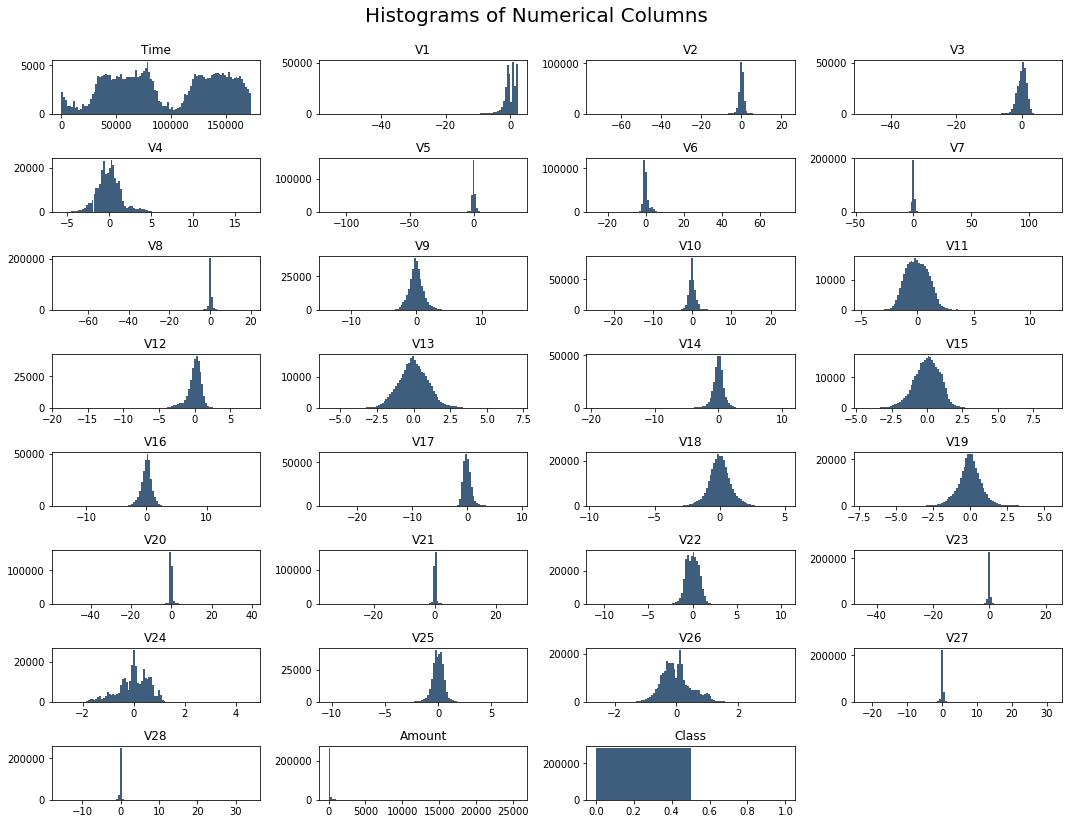

In [4]:
dataset2 = data
# Fit the screen
fig = plt.figure(figsize=(15, 12))
# Set the main title
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
# For each column in the dataset
for i in range(dataset2.shape[1]):
    # Get 6 rows with 3 plots per row
    plt.subplot(8, 4, i+1)
    # gca=get current axis
    f = plt.gca()
    # Set the title of each plot to its column name
    f.set_title(dataset2.columns.values[i])

    # Get the number of unique values as the number of bins
    vals = np.size(dataset2.iloc[:, i].unique())
    # If there are more than 10 unique values, then it defaults to 100. Ensures that it will not crash my system
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Correlation between Explanatory Variables

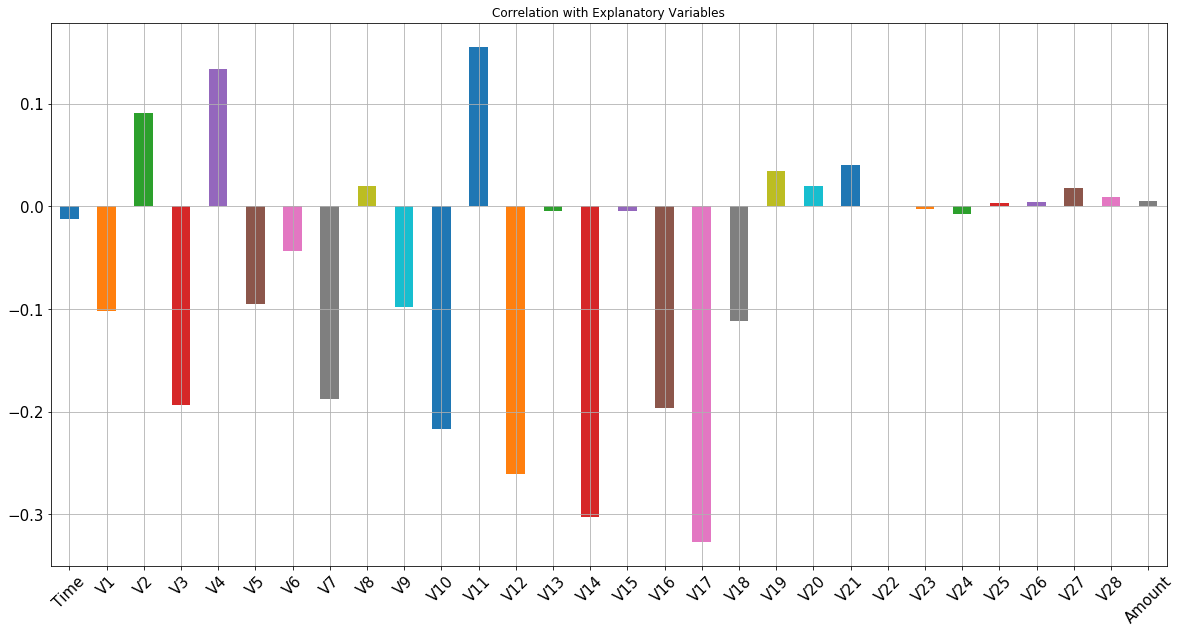

In [5]:
# Get the correlation of the dataset witht the e_signed column
# Plot those results on a bar chart
"""Parameters-figsize-shape of the plot
              title-title of plot
              fontsize-size of the font
              rot-45 degree for x-axis labels
              grid-plot on gridlines"""
dataset2 = dataset2.drop(columns = ["Class"])
dataset2.corrwith(data["Class"]).plot.bar(
        figsize = (20, 10), title = "Correlation with Explanatory Variables", fontsize = 15,
        rot = 45, grid = True)


## Correlation Matrix

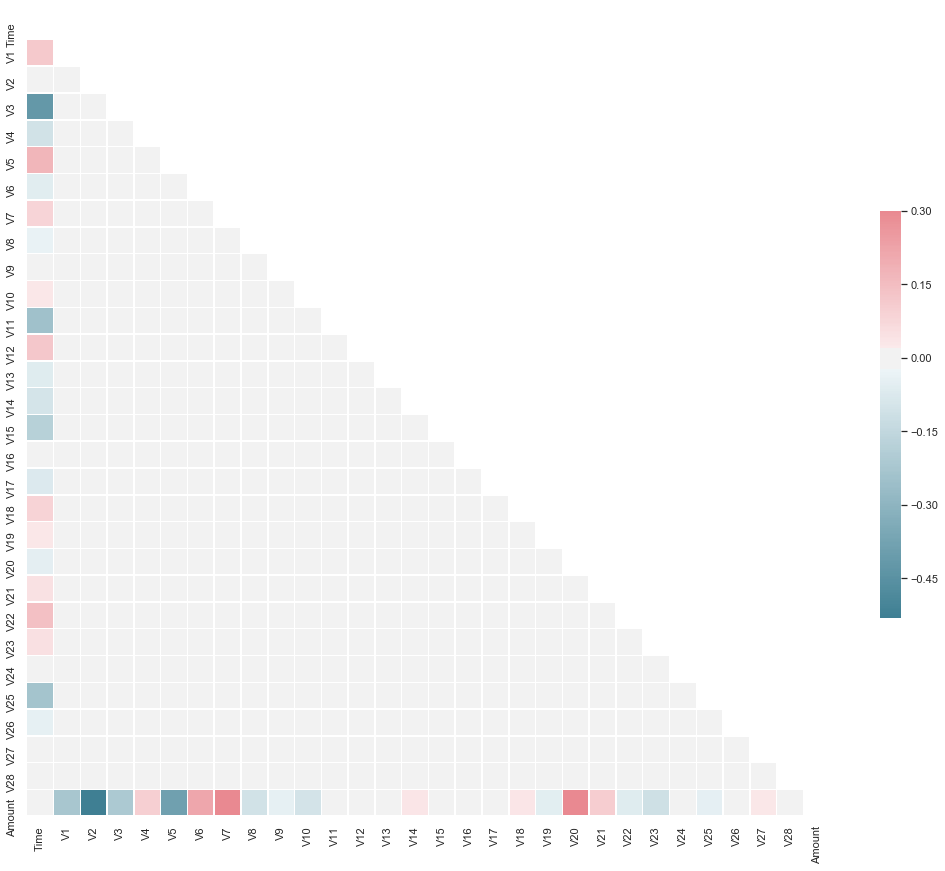

In [6]:
# Set to a white background
sn.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Pre-processing

In [7]:
from sklearn.preprocessing import StandardScaler
# Apply Standard Scaler to the amount data and store that in a new column called normalized amount
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# Drop the original amount column since we no longer need it
data = data.drop(['Amount'],axis=1)

In [8]:
# Explore the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
# Drop the time column since it is irrelevant to our model
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
# Set our feature data to all features that is not the the dependent variable (class)
X = data.iloc[:, data.columns != 'Class']
# Set Class as our dependent variable
y = data.iloc[:, data.columns == 'Class']

In [11]:
# Explore our dependent variable
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [12]:
# Split the dataset into Training and Testing Data with a 70:30 Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [13]:
# View the shape of the dataset (200,000 rows with 29 columns)
X_train.shape

(199364, 29)

In [14]:
# View the shape of the test set
X_test.shape

(85443, 29)

In [15]:
# Create np arrays so that it will work in our deep learning model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [16]:
# Import the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [17]:
# Create a sequential model with many dense layers
# Drop out in the middle to avoid overfitting
# Then create more dense layers with relu activation functions
# Use sigmoid activation function at the end since we have a binary target variable
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


## Training

In [19]:
# Compile the model with the adam optimizer with binary cross_entropy
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Fit the model to the training data with a batch size of 15
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 13s 67us/step - loss: 0.0099 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 13s 64us/step - loss: 0.0041 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 14s 69us/step - loss: 0.0037 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 13s 67us/step - loss: 0.0036 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 14s 70us/step - loss: 0.0031 - acc: 0.9994


In [20]:
# Get the score by evaluating our model on the test data
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 14us/step


In [21]:
# Display the score
# Results-99.93 % accuracy
print(score)

[0.0042986494001462285, 0.9994148145547324]


## Plot the Confusion Matrix

In [22]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [23]:
# Get the predicted values from the model
y_pred = model.predict(X_test)
# Get the actual values
y_test = pd.DataFrame(y_test)

In [24]:
# Get the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [25]:
print(cnf_matrix)

[[85279    17]
 [   33   114]]


Confusion matrix, without normalization
[[85279    17]
 [   33   114]]


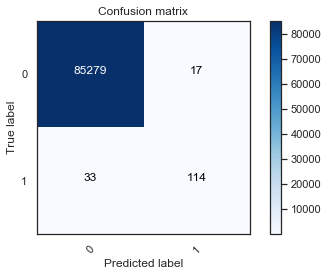

In [26]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [27]:
plt.show()

Confusion matrix, without normalization
[[284254     61]
 [   104    388]]


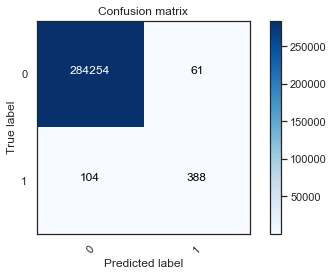

In [28]:
# Get the predicted values based on the training data
y_pred = model.predict(X)
# Get the expected values based on the y_data
y_expected = pd.DataFrame(y)
# Show confusion matrix based on the training data
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## Undersampling

In [29]:
# Get the number of fraudulent transactions
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [30]:
# Get the non-fradulent transactions
normal_indices = data[data.Class == 0].index

In [31]:
# Get the same number of non-fradulent transactions as fradulent transactions
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [32]:
# Concatenate the indexes to combine all the fraudlent and non_fraudulent transactions
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [33]:
under_sample_data = data.iloc[under_sample_indices,:]

In [34]:
# Get the X samples as all features that arent Class
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
# Set Class as dependent variable
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [35]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [36]:
# Convert the data into np.arrays so it works in the model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [37]:
# View the shape of the data
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model to train the model again on the undersampled data
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 0s 587us/step - loss: 0.6214 - acc: 0.9084
Epoch 2/5
688/688 [==============================] - 0s 91us/step - loss: 0.2649 - acc: 0.9302
Epoch 3/5
688/688 [==============================] - 0s 90us/step - loss: 0.1778 - acc: 0.9375
Epoch 4/5
688/688 [==============================] - 0s 86us/step - loss: 0.1479 - acc: 0.9448
Epoch 5/5
688/688 [==============================] - 0s 86us/step - loss: 0.1450 - acc: 0.9448


Confusion matrix, without normalization
[[150   0]
 [ 20 126]]


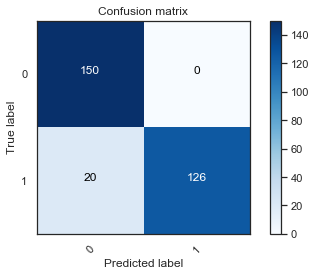

In [39]:
# Create the confusion matrix on the undersampled data
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283853    462]
 [    55    437]]


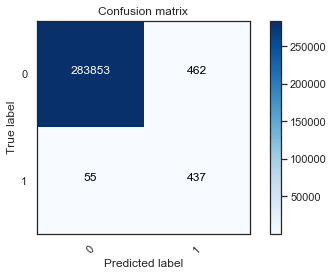

In [40]:
# Predict the model on the whole data set
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## SMOTE

In [41]:
%%bash
#pip install -U imbalanced-learn

Couldn't find program: 'bash'


In [42]:
# Import smote
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Get resampled data by fitting smote to the dataset
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [ ]:
# Convert them to dataframes
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [ ]:
# Split the data into training and sets
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [ ]:
# Convert to numpy arrays to work in the model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Train the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

In [ ]:
# Create the confusion matrix on the test data
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
# Create the confusion matrix on the entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()